# NBA Stats

### With March Madness coming up, it's a great time to look at the stats from this season to build your team.

### Download the data set from : http://www.dougstats.com/16-17RD.txt

### A key aspect of analyzing data is understanding what all of the columns mean.
### Go to http://www.dougstats.com/ExelNotes.html to see the definitions for each column name.

#### Start by importing the necessary libaries and reading the text file into memory. Note: You'll need to use a different separator. Search in google for the documentation on how to do so.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data
df = pd.read_fwf("NBA_2015-2016RD_stats.txt")
#Split player name into First and Last
df = df['Player'].str.split(',', 1, expand=True).join(df, how="left")
#Rename columns from split
df = df.rename(columns = {0:'Last',
                     1:'First',
                     'Player':'player',
                     'Team':'team',
                     'PS':'player_position',
                     'GP':'games_played',
                     'Min':'total_minutes_played',
                     'FGM':'field_goals_made',
                     'FGA':'field_goals_attempted',
                     '3M':'threes_made',
                     '3A':'threes_attempted',
                     'FTM':'free_throws_made',
                     'FTA':'free_throws_attempted',
                     'OR':'offensive_rebounds',
                     'TR':'total_rebounds',
                     'AS':'assists',
                     'ST':'steals',
                     'TO':'turnovers',
                     'BK':'blocks',
                     'PF':'personal_fouls',
                     'DQ':'disqualifications',
                     'PTS':'total_points',
                     'TC':'technicals',
                     'EJ':'EJ',
                     'FF':'FF',
                     'Sta':'games_started',
                     '+/-':'+/-'
                    })

df.head()

,Last,First,player,team,player_position,games_played,total_minutes_played,field_goals_made,field_goals_attempted,threes_made,...,turnovers,blocks,personal_fouls,disqualifications,total_points,technicals,EJ,FF,games_started,+/-
0,acy,quincy,"acy,quincy",sac,SF,59,877,119,214,19,...,27,24,103,0,307,3,0,0,29,-128
1,adams,jordan,"adams,jordan",mem,SG,2,15,2,6,0,...,2,0,2,0,7,0,0,0,0,4
2,adams,steven,"adams,steven",okl,C,80,2019,261,426,0,...,84,89,223,2,636,2,0,0,80,477
3,afflalo,arron,"afflalo,arron",nyk,SG,71,2359,354,799,91,...,82,10,142,1,909,1,0,0,57,-154
4,ajinca,alexis,"ajinca,alexis",nor,C,59,863,150,314,0,...,54,36,134,0,352,2,0,0,17,-68


#### What position has the most points? Bonus: Is this statistical significant difference?

In [2]:
#Answers the question of who has the most points (which is a sum)
most_points = df.groupby(['player_position'])['total_points'].sum().sort_values(ascending=False)
print(most_points)
print('\n')
most_points_mean = df.groupby(['player_position'])['total_points'].mean().sort_values(ascending=False)
print(most_points_mean)
print('\n')

#The question above is likely meant to be "Is there a stat. sign. difference in mean pts scored for each position?"
from scipy.stats import ttest_ind

#Make subsets of point guards and all other players
pg = df[df['player_position']=='PG']
others = df[df['player_position']!='PG']
sf = df[df['player_position']!='SF']

def stat_diff(col1, col2, confidence):
    if(ttest_ind(col1, col2).pvalue < confidence):
        print('There is a statistical difference in the mean between col1 and col2.')
    else:
        print('There is not a statistical difference in the mean between col1 and col2.')
    print('\n')

#Difference at 95% between point guards and all other
stat_diff(pg['total_points'], others['total_points'], 0.05)
#No difference at 95% between point guards and power forward (next best player)
stat_diff(pg['total_points'], sf['total_points'], 0.05)



player_position
PG    60908
SG    57024
SF    49958
PF    49834
C     34803
??        6
Name: total_points, dtype: int64


player_position
PG    615.232323
SF    580.906977
SG    523.155963
C     497.185714
PF    448.954955
??      6.000000
Name: total_points, dtype: float64


There is a statistical difference in the mean between col1 and col2.


There is not a statistical difference in the mean between col1 and col2.




#### What player has the most number of rebounds?

In [3]:
most_rebounds = df.groupby(['First', 'Last'])['total_rebounds'].sum().sort_values(ascending=False)
most_rebounds.head(1)
     

First   Last     
hassan  whiteside    865
Name: total_rebounds, dtype: int64

#### What team has the best three point conversion rate? ( made / attempts)

In [4]:
team = df['team']
fgm = df['field_goals_made']
fga = df['field_goals_attempted']

best_conv = pd.DataFrame({'team':team, 'fgm':fgm, 'fga':fga}).groupby(['team'])['fgm', 'fga'].sum()
best_conv['conv_rate'] = best_conv['fgm']/best_conv['fga']

#Team gsw has the best conversion rate
best_conv.sort_values('conv_rate', ascending=False).head(1)

,fgm,fga,conv_rate
team,,,
gsw,3501,7192,0.486791


#### What team has the most number of points?

In [5]:
#Team gsw has the most accumulated points
df.groupby('team')['total_points'].sum().sort_values(ascending=False).head(1)

team
gsw    9441
Name: total_points, dtype: int64

#### Create your own custom equation to rank all the team's performance. Include at least three metrics

In [6]:
team_rank = df.groupby(['team'])['total_rebounds', 'total_points', 'games_played'].sum()
team_rank['rank'] = team_rank['total_rebounds'] + team_rank['total_points'] * 12 + team_rank['games_played'] * 15
team_rank.sort_values('rank', ascending=False)

,total_rebounds,total_points,games_played,rank
team,,,,
gsw,3823,9441,942,131245
was,3700,9385,943,130465
san,3675,8925,1008,125895
nor,3659,9016,922,125681
mia,3850,8898,844,123286
por,3720,8716,892,121692
lac,2451,8822,874,121425
okl,3888,8730,822,120978
atl,3606,8618,919,120807


In [58]:
#df[df['team'=='gsw'] or df['team'=='was']] #.groupby('team')['team', 'total_points'].sum() #.plot(x = 'team', y = 'total_points', kind = "bar")
#plt.show()

df[df['team']=='gsw' or df['team']=='was']





















ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

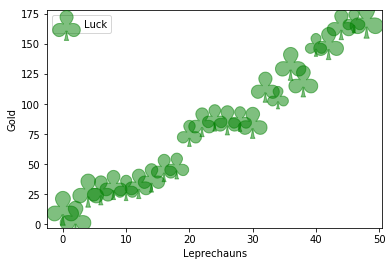

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc=2)
plt.show()